# Fenti_Irnawati_VIX_ID/X Partners


#Soal


- membangun model yang dapat memprediksi credit risk menggunakan dataset yang terdiri dari data pinjaman yang diterima dan yang ditolak.

- siapkan media visual untuk mempresentasikan solusi ke klien.

- Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

**Format Pengumpulan Tugas**

- File Code dengan format .py

- File Python Notebook dengan format .ipynb

- File infografis sebagai media presentasi end-to-end solution

- Gabung ketiga file dalam satu folder ZIP yang diberi judul "[Nama Lengkap]_VIX_ID/X Partners"

Notes: Output 3 file (Python: .py, .ipnyb) dan PPT infografis beserta penjelasannya:
* isi code antara py dan ipynb boleh disamakan
* ipynb/Rmd dapat disertakan penjelasan dari code dan boleh disertakan juga materi yang diketahui (dengan sumber referensi)

# Fokus Masalah
- Analisis resiko kredit cenderung gagal/berhasil, apa faktor penyertanya
- Modelkan berdasarkan faktor penyerta apa saja yang bisa mendukung gagal/berhasilnya suatu kredit
- Modelkan prediksi di terima atau tidaknya suatu kredit. pemodelan ini dapat mempercepat keputusan penerimaan atau penolakan dengan pertimbangan yang lebih objektif dan adil (semoga)

# Alur Berfikir

Berdasarkan soal dan fokus masalah yang di identifikasi, hal yang perlu di lakukan pertama adalah menentukan jenis solusi model machine learning apa yang akan di gunakan, yaitu, supervised learning (regression-risk management prediction), alur kerja sbb:
Outline 📚

    Loading and Exploring the data

    Cleansing

        Working with Missing values

        Dropping Unecessary columns

    Visualization Or Making a Story Board

    Encoding the Categorical data

    Model Development

        Dividing the data

        Using GaussianNB

        Loss Function

        Using SVC With Grid Search CV

        XGBoost Classifier

        Decision Tree Using Randomized Search

        Random Forest Using Randomized Search

    Selecting and Saving the Model

    Deployment (try my very best for it)







# Loading and Exploring the data

In [102]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving loan_data_2007_2014.csv to loan_data_2007_2014 (1).csv


In [104]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv("loan_data_2007_2014.csv")

df=pd.DataFrame(df)
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:

df.shape

(28061, 75)

In [106]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [107]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,28061.000000,2.806100e+04,2.806100e+04,28061.000000,28061.000000,28061.000000,28060.000000,28060.000000,2.806000e+04,28060.000000,28060.000000,28060.000000,9585.000000,1482.000000,28060.000000,28060.000000,28060.000000,28042.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.000000,28060.0,0.0,28060.0,0.0,0.0,0.0,28060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,14030.000000,7.852712e+05,9.838452e+05,11719.626884,11439.611917,11264.217326,12.089463,326.826117,6.923565e+04,13.653771,0.149644,0.839202,37.016797,93.545884,9.326835,0.054383,13390.640413,50.014290,22.401461,194.459446,193.325627,12659.158042,12461.325001,10048.334391,2509.539966,1.077926,100.205782,9.638929,2964.449619,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8100.657288,1.571242e+05,1.792026e+05,7870.690679,7577.258474,7432.960121,4.054072,211.234402,5.065833e+04,6.679055,0.505032,1.045500,21.532007,21.002643,4.361697,0.234199,15706.986821,28.038432,11.315754,890.219970,886.343686,9474.743522,9289.089996,7306.408522,2917.470848,6.075074,682.498147,104.913520,4775.906416,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,6.694300e+04,1.829350e+05,1000.000000,1000.000000,400.000000,5.420000,20.220000,4.800000e+03,0.000000,0.000000,0.000000,1.000000,11.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7015.000000,6.473270e+05,8.277830e+05,5600.000000,5600.000000,5575.000000,8.880000,167.730000,4.200000e+04,8.490000,0.000000,0.000000,19.000000,88.000000,6.000000,0.000000,3898.000000,27.100000,14.000000,0.000000,0.000000,5645.056668,5592.170000,4660.005000,669.077500,0.000000,0.000000,0.000000,235.875000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14030.000000,7.698920e+05,9.710270e+05,10000.000000,10000.000000,9942.198028,11.710000,283.630000,6.000000e+04,13.720000,0.000000,1.000000,35.000000,98.000000,9.000000,0.000000,9017.500000,50.950000,21.000000,0.000000,0.000000,10282.780000,10149.310000,8400.000000,1405.385000,0.000000,0.000000,0.000000,594.095000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,21045.000000,8.856750e+05,1.100588e+06,15400.000000,15000.000000,15000.000000,15.200000,431.600000,8.400000e+04,18.920000,0.000000,1.000000,53.000000,108.000000,12.000000,0.000000,17062.250000,73.300000,29.000000,0.000000,0.000000,17095.275030,16864.730000,14000.000000,3194.762500,0.000000,0.000000,0.000000,3800.080000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,28060.000000,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,1.900000e+06,29.990000,11.000000,8.000000,120.000000,119.000000,39.000000,3.000000,149588.000000,99.900000,87.000000,10418.060000,10410.560000,56809.051630,56475.050000,35000.030000,23062.450000,146.040000,29623.350000,7002.1

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   28061 non-null  int64  
 1   id                           28061 non-null  int64  
 2   member_id                    28061 non-null  int64  
 3   loan_amnt                    28061 non-null  int64  
 4   funded_amnt                  28061 non-null  int64  
 5   funded_amnt_inv              28061 non-null  float64
 6   term                         28061 non-null  object 
 7   int_rate                     28060 non-null  float64
 8   installment                  28060 non-null  float64
 9   grade                        28060 non-null  object 
 10  sub_grade                    28060 non-null  object 
 11  emp_title                    26281 non-null  object 
 12  emp_length                   27114 non-null  object 
 13  home_ownership  

FEATURES DEFINITION

In [109]:
uploaded = files.upload()

Saving LCDataDictionary.xlsx to LCDataDictionary (1).xlsx


In [ ]:
dics=pd.read_excel("LCDataDictionary.xlsx").dropna()

dics=pd.DataFrame(dics)
dics

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
...,...,...,...
73,total_rec_prncp,Principal received to date,Kepala sekolah diterima hingga saat ini
74,total_rev_hi_lim,Total revolving high credit/credit limit,Total Batas Kredit/Kredit Tinggi Revolving
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...


Keterangan Nama Kolom

    id: Kolom ini berisi ID untuk setiap entri dalam dataset.

    member_id: Kolom ini berisi ID anggota untuk setiap entri dalam dataset.

    loan_amnt: Kolom ini berisi jumlah pinjaman yang diminta.

    funded_amnt: Kolom ini berisi jumlah pinjaman yang disetujui.

    funded_amnt_inv: Kolom ini berisi jumlah pinjaman yang diterima oleh peminjam.

    term: Kolom ini berisi periode pinjaman dalam bentuk teks.

    int_rate: Kolom ini berisi tingkat bunga pinjaman.

    installment: Kolom ini berisi jumlah pembayaran bulanan.

    grade: Kolom ini berisi peringkat pinjaman.

    sub_grade: Kolom ini berisi sub-peringkat pinjaman.

    emp_title: Kolom ini berisi judul pekerjaan peminjam.

    emp_length: Kolom ini berisi lama waktu bekerja peminjam.

    home_ownership: Kolom ini berisi status kepemilikan rumah peminjam.

    annual_inc: Kolom ini berisi pendapatan tahunan peminjam.

    verification_status: Kolom ini berisi status verifikasi informasi peminjam.

    issue_d: Kolom ini berisi tanggal penerbitan pinjaman.

    loan_status: Kolom ini berisi status pinjaman.

    pymnt_plan: Kolom ini berisi apakah ada rencana pembayaran pinjaman.

    url: Kolom ini berisi URL terkait pinjaman.

    desc: Kolom ini berisi deskripsi pinjaman.

    purpose: Kolom ini berisi tujuan pinjaman.

    title: Kolom ini berisi judul pinjaman.

    zip_code: Kolom ini berisi kode pos peminjam.

    addr_state: Kolom ini berisi negara bagian alamat peminjam.

    dti: Kolom ini berisi rasio utang-terhadap-pendapatan (debt-to-income ratio) peminjam.

    delinq_2yrs: Kolom ini berisi jumlah tunggakan pembayaran dalam 2 tahun terakhir.

    earliest_cr_line: Kolom ini berisi tanggal pembukaan akun kredit paling awal.

    inq_last_6mths: Kolom ini berisi jumlah permintaan kredit dalam 6 bulan terakhir.

    mths_since_last_delinq: Kolom ini berisi jumlah bulan sejak tunggakan pembayaran terakhir.

    mths_since_last_record: Kolom ini berisi jumlah bulan sejak catatan tunggakan terakhir.

    open_acc: Kolom ini berisi jumlah rekening yang terbuka saat ini.

    pub_rec: Kolom ini berisi jumlah catatan publik yang ada.

    revol_bal: Kolom ini berisi saldo utang yang berputar (revolving balance).

    revol_util: Kolom ini berisi penggunaan total dari semua kredit berputar.

    total_acc: Kolom ini berisi jumlah total rekening yang dilaporkan.

    initial_list_status: Kolom ini berisi status awal daftar pinjaman.

    out_prncp: Kolom ini berisi saldo pokok pinjaman yang belum terbayar.

    out_prncp_inv: Kolom ini berisi saldo pokok pinjaman yang belum terbayar yang telah diinvestasikan.

    total_pymnt: Kolom ini berisi total pembayaran yang telah dilakukan.

    total_pymnt_inv: Kolom ini berisi total pembayaran yang telah dilakukan yang telah diinvestasikan.

    total_rec_prncp: Kolom ini berisi total saldo pokok yang telah diterima.

    total_rec_int: Kolom ini berisi total bunga yang telah diterima.

    total_rec_late_fee: Kolom ini berisi total denda keterlambatan yang telah diterima.

    recoveries: Kolom ini berisi jumlah pemulihan yang telah diterima.

    collection_recovery_fee: Kolom ini berisi biaya pemulihan yang telah diterima.

    last_pymnt_d: Kolom ini berisi tanggal terakhir pembayaran dilakukan.

    last_pymnt_amnt: Kolom ini berisi jumlah terakhir pembayaran dilakukan.

    next_pymnt_d: Kolom ini berisi tanggal pembayaran berikutnya.

    last_credit_pull_d: Kolom ini berisi tanggal terakhir data kredit diperbarui.

    collections_12_mths_ex_med: Kolom ini berisi jumlah koleksi yang dikumpulkan dalam 12 bulan terakhir, tidak termasuk koleksi medis.

    mths_since_last_major_derog: Kolom ini berisi jumlah bulan sejak kejadian negatif utama terakhir.

    policy_code: Kolom ini berisi kode kebijakan pinjaman.

    application_type: Kolom ini berisi jenis aplikasi pinjaman.

    annual_inc_joint: Kolom ini berisi pendapatan tahunan bersama (jika ada).

    dti_joint: Kolom ini berisi rasio utang-terhadap-pendapatan bersama (jika ada).

    verification_status_joint: Kolom ini berisi status verifikasi informasi bersama (jika ada).

    acc_now_delinq: Kolom ini berisi jumlah akun yang sedang dalam penungguan pembayaran saat ini.

    tot_coll_amt: Kolom ini berisi total jumlah tagihan yang tertunggak.

    tot_cur_bal: Kolom ini berisi total saldo saat ini dari semua akun yang dilaporkan.

    open_acc_6m: Kolom ini berisi jumlah akun yang terbuka dalam 6 bulan terakhir.

    open_il_6m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 6 bulan terakhir.

    open_il_12m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 12 bulan terakhir.

    open_il_24m: Kolom ini berisi jumlah akun instalasi yang terbuka dalam 24 bulan terakhir.

    mths_since_rcnt_il: Kolom ini berisi jumlah bulan sejak akun instalasi yang terbuka terakhir.

    total_bal_il: Kolom ini berisi saldo total dari semua akun instalasi.

    il_util: Kolom ini berisi rasio penggunaan instalasi.

    open_rv_12m: Kolom ini berisi jumlah akun kartu yang terbuka dalam 12 bulan terakhir.

    open_rv_24m: Kolom ini berisi jumlah akun kartu yang terbuka dalam 24 bulan terakhir.

    max_bal_bc: Kolom ini berisi saldo tertinggi yang pernah diperoleh pada kartu kredit.

    all_util: Kolom ini berisi rasio penggunaan total dari semua akun.

    total_rev_hi_lim: Kolom ini berisi jumlah total batas kredit revolving tinggi.

    inq_fi: Kolom ini berisi jumlah permintaan keuangan dalam beberapa bulan terakhir.

    total_cu_tl: Kolom ini berisi jumlah akun kredit yang dibuka dalam beberapa bulan terakhir.

    inq_last_12m: Kolom ini berisi jumlah permintaan kredit dalam 12 bulan terakhir.

#Cleansing

Missing Value and its Percentage / NAN

<Axes: >

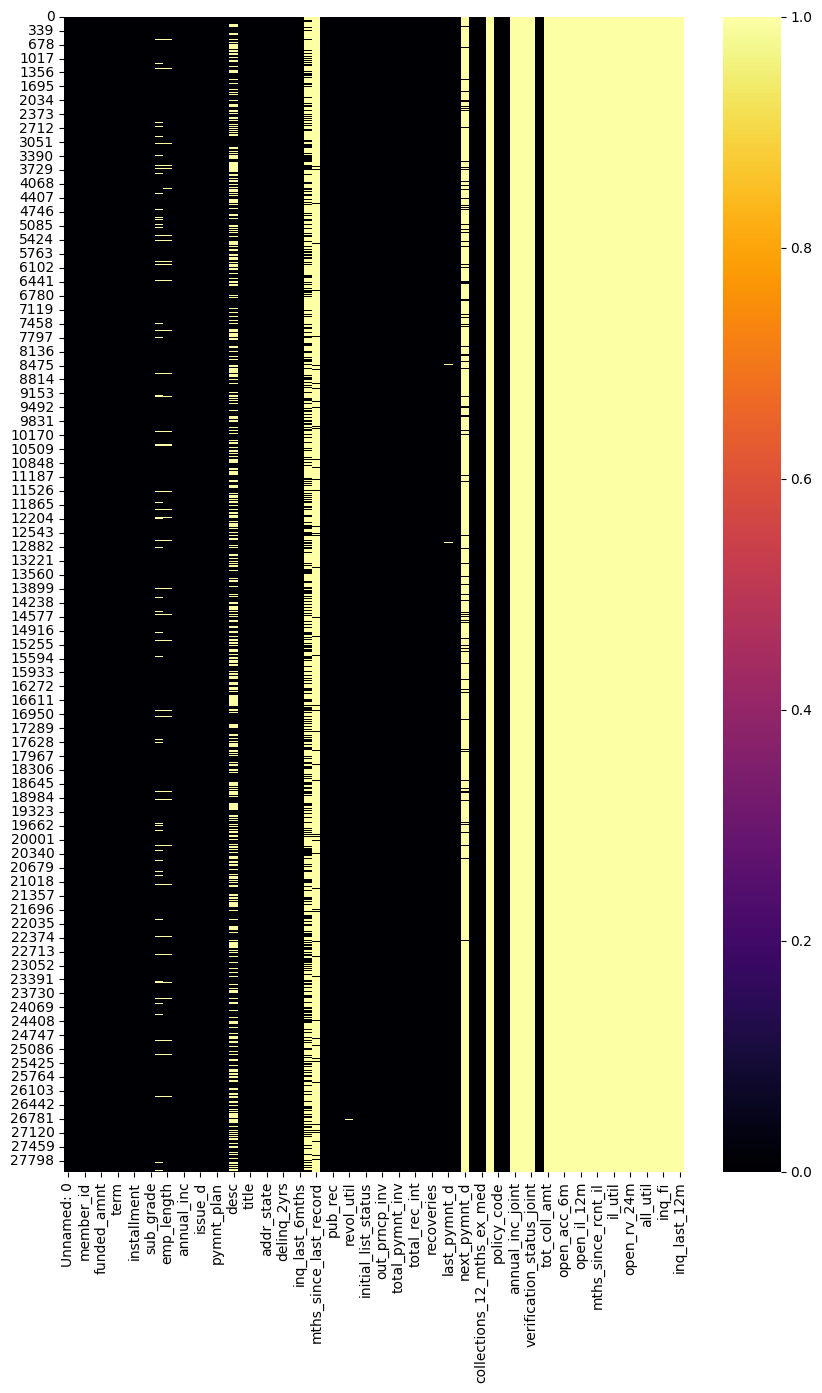

In [110]:
#kita lihat dulu grafik ini lalu bertanya , ini NAN atau NULL?

fig = plt.figure(figsize=(10,15))
sns.heatmap(df.isna(),cmap='inferno')



In [111]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentages = (missing_values / len(df)) * 100

# Create a new DataFrame to store the missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentages})

# Sort the DataFrame by percentage in descending order
missing_data = missing_data.sort_values('Percentage', ascending=False)

# Print the missing data
print(missing_data)


                             Missing Values  Percentage
inq_last_12m                          28061       100.0
dti_joint                             28061       100.0
annual_inc_joint                      28061       100.0
mths_since_last_major_derog           28061       100.0
tot_coll_amt                          28061       100.0
...                                     ...         ...
funded_amnt_inv                           0         0.0
funded_amnt                               0         0.0
loan_amnt                                 0         0.0
member_id                                 0         0.0
Unnamed: 0                                0         0.0

[75 rows x 2 columns]


In [112]:
def missing_values(df):
    a = num_null_values = df.isnull().sum()
    return a

In [113]:
missing_values(df)

Unnamed: 0              0
id                      0
member_id               0
loan_amnt               0
funded_amnt             0
                    ...  
all_util            28061
total_rev_hi_lim    28061
inq_fi              28061
total_cu_tl         28061
inq_last_12m        28061
Length: 75, dtype: int64

di lihat dari grafik data, data kosong ini adalah NAN (bisa juga null)untuk olah data sepertinya kolom ini harus di hapus.

###Null Value

Adanya null value dalam dataset dapat memiliki implikasi yang signifikan dalam analisis data, seperti:

Penyimpangan statistik: Null value dapat mempengaruhi perhitungan statistik seperti mean, median, atau deviasi standar. Jika null value tidak ditangani dengan benar, dapat menghasilkan estimasi yang bias atau tidak akurat.

Kehilangan informasi: Null value mengindikasikan bahwa ada informasi yang hilang dalam dataset. Hal ini dapat mengurangi kelengkapan dan keberhasilan analisis data, terutama jika jumlah null value yang signifikan.

Analisis yang tidak akurat: Jika null value tidak ditangani dengan benar, dapat menghasilkan hasil analisis yang tidak akurat atau bias. Misalnya, jika null value diabaikan atau diisi dengan nilai yang salah, ini dapat menghasilkan kesimpulan yang keliru.

Kesalahan dalam model prediksi: Null value dapat menyebabkan masalah dalam membangun model prediksi. Beberapa algoritma atau metode tidak dapat menangani null value secara langsung, dan memerlukan penanganan khusus seperti imputasi (pengisian nilai yang hilang) atau penghapusan data yang memiliki null value.

In [114]:
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
tot_cur_bal,100.00
open_acc_6m,100.00
total_cu_tl,100.00
inq_fi,100.00
total_rev_hi_lim,100.00
all_util,100.00
max_bal_bc,100.00
open_rv_24m,100.00
open_rv_12m,100.00
il_util,100.00


In [115]:
# Menghitung persentase nilai yang hilang dalam setiap kolom
null_percent = round(df.isnull().sum() / len(df.index) * 100, 2)

# Mendapatkan daftar kolom yang memiliki persentase nilai yang hilang di atas 10%
cols_to_drop = null_percent[null_percent > 10].index.tolist()

# Menjatuhkan (drop) kolom-kolom yang memiliki nilai yang hilang di atas 10%
df = df.drop(cols_to_drop, axis=1)


In [116]:
df.shape

(28061, 50)

<Axes: >

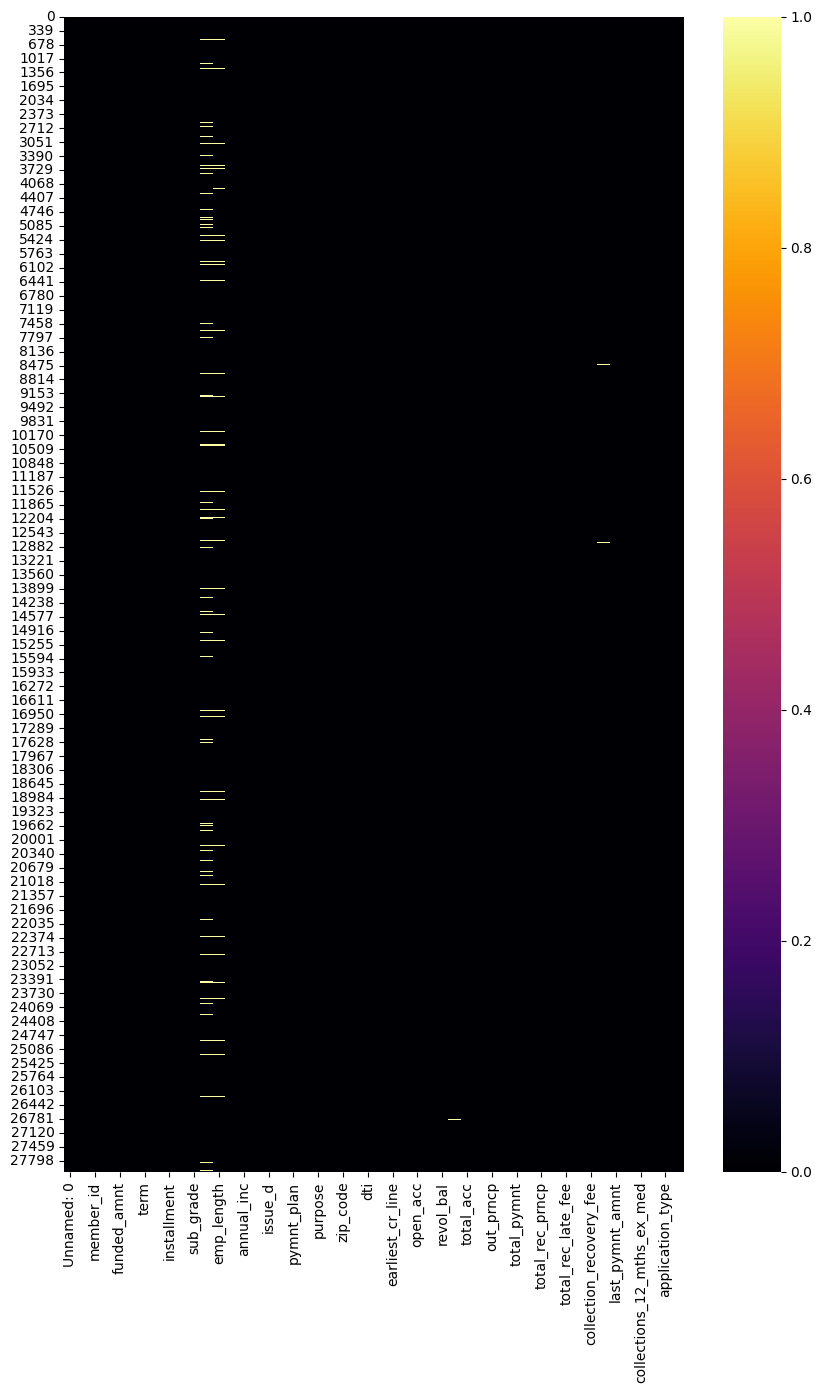

In [117]:
fig = plt.figure(figsize=(10,15))
sns.heatmap(df.isna(),cmap='inferno')



i think better , even still have , liitle bit soft-yellow

Another thing we would want to examine is that how many loans have a default loan status in comparison to other loans. A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

In [118]:
df.isnull().sum()

Unnamed: 0                       0
id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         1
installment                      1
grade                            1
sub_grade                        1
emp_title                     1780
emp_length                     947
home_ownership                   1
annual_inc                       1
verification_status              1
issue_d                          1
loan_status                      1
pymnt_plan                       1
url                              1
purpose                          1
title                            3
zip_code                         1
addr_state                       1
dti                              1
delinq_2yrs                      1
earliest_cr_line                 1
inq_last_6mths                   1
open_acc            

still need more insight for stabilize these data emp_title                     1780
emp_length                     947
ect
its important data or not, could i drop it or not


Uniqe and Data type

informasi data unik:

 dapat mengidentifikasi kategori-kategori tersebut dan melihat distribusi data dalam setiap kategori.

menggunakan informasi jumlah nilai unik dalam pemilihan fitur. Jika suatu kolom memiliki jumlah nilai unik yang sangat rendah (misalnya, hanya 1 atau 2 nilai unik), kolom tersebut mungkin tidak memberikan informasi yang signifikan dan dapat diabaikan dalam analisis selanjutnya.

Informasi tipe data dapat membantu memahami jenis nilai yang ada dalam kolom. Misalnya, jika tipe data kolom adalah objek, ini mungkin menunjukkan bahwa kolom tersebut berisi data teks atau kategori yang perlu diubah menjadi tipe data yang sesuai.

dapat melakukan pemeriksaan integritas data. Jika ada kolom dengan jumlah nilai unik yang tidak sesuai dengan harapan (misalnya, kolom dengan hanya beberapa nilai unik pada kolom yang seharusnya berisi lebih banyak variasi), mungkin ada kesalahan atau masalah dalam pengumpulan atau pengolahan data.

Analisis variabel target: Jumlah nilai unik dalam kolom target (misalnya, kolom 'loan_status' dalam contoh yang diberikan) dapat memberikan wawasan tentang seimbang atau tidak seimbangnya kelas target. Ini dapat membantu  dalam pemahaman awal tentang masalah klasifikasi atau regresi yang mungkin dihadapi.

In [119]:

# Mengklasifikasikan jumlah nilai unik dan tipe data pada setiap kolom
data_type_counts = pd.DataFrame({'nunique': df.nunique(), 'data type': df.dtypes})

# Menampilkan hasil klasifikasi
print(data_type_counts)


                            nunique data type
Unnamed: 0                    28061     int64
id                            28061     int64
member_id                     28061     int64
loan_amnt                       847     int64
funded_amnt                    1015     int64
funded_amnt_inv                3726   float64
term                              3    object
int_rate                        189   float64
installment                   11189   float64
grade                             7    object
sub_grade                        35    object
emp_title                     21040    object
emp_length                       11    object
home_ownership                    4    object
annual_inc                     3884   float64
verification_status               3    object
issue_d                          18    object
loan_status                       7    object
pymnt_plan                        2    object
url                           28060    object
purpose                          1

In [120]:
# Mengidentifikasi kolom dengan jumlah nilai unik yang rendah
low_unique_cols = []
for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count <= 1:
        low_unique_cols.append(column)

# Menampilkan kolom dengan jumlah nilai unik yang rendah
print("Kolom dengan jumlah nilai unik rendah:")
print(low_unique_cols)

Kolom dengan jumlah nilai unik rendah:
['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq']


kolom rendah unik sepertinya masih bisa di wakili oleh kolom lain, maka saya putuskan untuk menghapus kolom tersebut

Droping kolom,
i literally have decided which more important than, for prediction i mean, little bit tricky for me

In [121]:
df.drop(low_unique_cols, axis=1, inplace=True)


In [122]:
df.shape

(28061, 45)

In [123]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [124]:
df.drop(['url', 'sub_grade', 'last_pymnt_d', 'pymnt_plan','issue_d', 'earliest_cr_line', 'emp_title','title', 'zip_code', 'addr_state','last_credit_pull_d'], axis=1, inplace=True)

In [125]:
df.shape

(28061, 34)

In [126]:
int64_cols = df.select_dtypes(include=['int64']).columns
int64_cols

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt'], dtype='object')

In [127]:
df.drop('member_id', axis=1, inplace=True)

In [128]:
df.drop('id', axis=1, inplace=True)

In [129]:
df.shape

(28061, 32)

In [130]:
float64_cols = df.select_dtypes(include=['float64']).columns
float64_cols

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [131]:
df.drop(['out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt','total_acc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec'], axis=1, inplace=True)

In [132]:
df.shape

(28061, 18)

In [133]:
df.drop(['open_acc'], axis=1, inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28061 non-null  int64  
 1   loan_amnt            28061 non-null  int64  
 2   funded_amnt          28061 non-null  int64  
 3   funded_amnt_inv      28061 non-null  float64
 4   term                 28061 non-null  object 
 5   int_rate             28060 non-null  float64
 6   installment          28060 non-null  float64
 7   grade                28060 non-null  object 
 8   emp_length           27114 non-null  object 
 9   home_ownership       28060 non-null  object 
 10  annual_inc           28060 non-null  float64
 11  verification_status  28060 non-null  object 
 12  loan_status          28060 non-null  object 
 13  purpose              28060 non-null  object 
 14  dti                  28060 non-null  float64
 15  revol_bal            28060 non-null 

### Duplicate Row

In [135]:
# Memeriksa keberadaan baris duplikat
duplicate_rows = df.duplicated()

# Menghitung jumlah baris duplikat
num_duplicate_rows = duplicate_rows.sum()

# Menampilkan baris duplikat
duplicate_data = df[duplicate_rows]

# Menampilkan hasil
if num_duplicate_rows > 0:
    print(f"Ada {num_duplicate_rows} baris duplikat dalam DataFrame:")
    print(duplicate_data)
else:
    print("Tidak ada baris duplikat dalam DataFrame.")

Tidak ada baris duplikat dalam DataFrame.


ubah tipe data / reformat data, akan di kerjakan ketika ada bugs ketidakcocokan type data

Target

In [136]:


df['loan_status'].value_counts()

Fully Paid            21957
Charged Off            4042
Current                1960
Late (31-120 days)       51
In Grace Period          28
Late (16-30 days)        13
Default                   9
Name: loan_status, dtype: int64

In [137]:
# Membuat fungsi untuk mengelompokkan nilai loan_status
def categorize_loan_status(status):
    if status in ['Fully Paid', 'Current']:
        return 'Approved'
    else:
        return 'Disapproved'

# Menggunakan fungsi untuk membuat kolom baru 'loan_status_category'
df['loan_status_category'] = df['loan_status'].apply(categorize_loan_status)

# Mencetak jumlah pinjaman dalam setiap kategori
print(df['loan_status_category'].value_counts())


Approved       23917
Disapproved     4144
Name: loan_status_category, dtype: int64


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28061 non-null  int64  
 1   loan_amnt             28061 non-null  int64  
 2   funded_amnt           28061 non-null  int64  
 3   funded_amnt_inv       28061 non-null  float64
 4   term                  28061 non-null  object 
 5   int_rate              28060 non-null  float64
 6   installment           28060 non-null  float64
 7   grade                 28060 non-null  object 
 8   emp_length            27114 non-null  object 
 9   home_ownership        28060 non-null  object 
 10  annual_inc            28060 non-null  float64
 11  verification_status   28060 non-null  object 
 12  loan_status           28060 non-null  object 
 13  purpose               28060 non-null  object 
 14  dti                   28060 non-null  float64
 15  revol_bal          

In [139]:
df.drop(['loan_status'], axis=1, inplace=True)

In [140]:
df.rename(columns={'loan_status_category': 'loan_status'}, inplace=True)


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28061 non-null  int64  
 1   loan_amnt            28061 non-null  int64  
 2   funded_amnt          28061 non-null  int64  
 3   funded_amnt_inv      28061 non-null  float64
 4   term                 28061 non-null  object 
 5   int_rate             28060 non-null  float64
 6   installment          28060 non-null  float64
 7   grade                28060 non-null  object 
 8   emp_length           27114 non-null  object 
 9   home_ownership       28060 non-null  object 
 10  annual_inc           28060 non-null  float64
 11  verification_status  28060 non-null  object 
 12  purpose              28060 non-null  object 
 13  dti                  28060 non-null  float64
 14  revol_bal            28060 non-null  float64
 15  revol_util           28042 non-null 



---



# DATA DISTRIBUTION, Visualisation

Feature Selection

untuk saat ini saya mencoba mempertimbangkan 16 kolom yang akan di olah. untuk kolom lain dapat di pertimbangkan kembali setelah diskusi lebih detail dengan divisi lainya.


---


    loan_amnt: Jumlah pinjaman yang diajukan.
    funded_amnt: Jumlah pinjaman yang disetujui untuk didanai.
    funded_amnt_inv: Jumlah pinjaman yang sebenarnya diterima oleh peminjam.
    term: Jangka waktu pinjaman dalam format teks (misalnya, "36 months").
    int_rate: Tingkat bunga pinjaman sebagai pecahan desimal.
    installment: Jumlah pembayaran bulanan yang harus dibayarkan oleh peminjam.
    grade: Tingkatan risiko pinjaman yang diberikan oleh pemberi pinjaman.
    emp_length: Jangka waktu pengalaman kerja peminjam dalam format teks (misalnya, "10+ years").
    home_ownership: Status kepemilikan rumah oleh peminjam (misalnya, "MORTGAGE", "RENT", "OWN").
    annual_inc: Pendapatan tahunan peminjam.
    verification_status: Status verifikasi informasi peminjam oleh pemberi pinjaman.
    purpose: Tujuan penggunaan pinjaman oleh peminjam.
    dti: Rasio utang-terhadap-pendapatan (Debt-to-Income Ratio) peminjam.
    revol_bal: Jumlah saldo total dari semua akun revolving (misalnya, kartu kredit) peminjam.
    revol_util: Tingkat penggunaan total kredit revolving oleh peminjam sebagai pecahan desimal.
    loan_status: Status pinjaman, yang telah dijelaskan sebelumnya.


---



In [144]:
### Visualization###
def bar_chart(col):
    Approved = df[df["loan_status"]=="Approved"][col].value_counts()
    Disapproved = df[df["loan_status"]=="Disapproved"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")

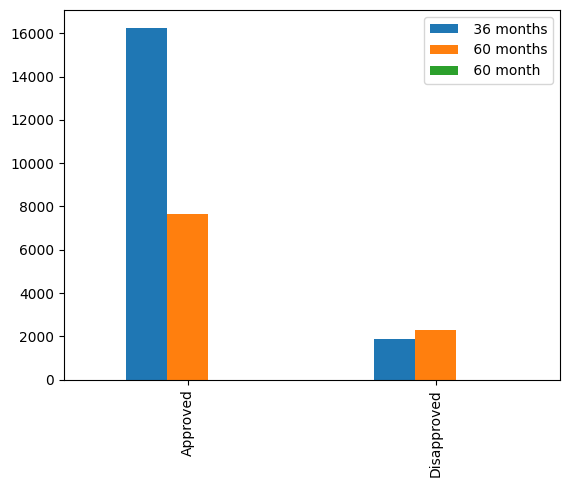

In [145]:
bar_chart("term")

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

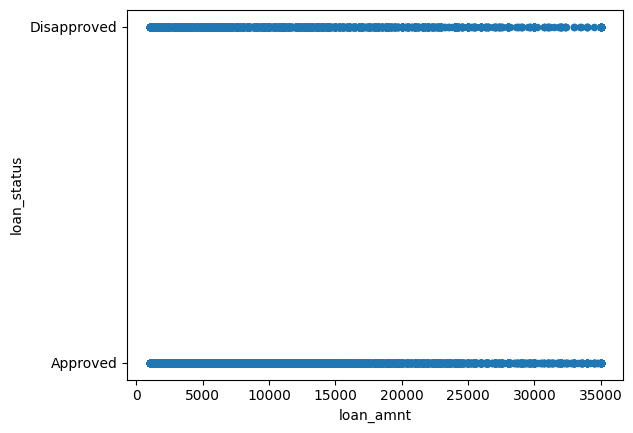

In [148]:
df.plot(kind='scatter', x='loan_amnt', y='loan_status')


give me a time, lemme think what best fir visualisation tipes to use

abis ini encoder for model